### 1.0 Import Libraries

In [487]:
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

### 2.0 Use BeautifulSoup and Urlopen to Retrieve Data

In [488]:
url = 'https://www.basketball-reference.com/leagues/NBA_2019_advanced.html'

html = urlopen(url)

soup = BeautifulSoup(html)

### 2.1 Get Headers from DataFrame

In [489]:
# soup.findAll('tr', limit=2) is finding all 'tr' tags, limit=2 ..... And .getText() is pulling the text of 'th'
headers = [th.getText() for th in soup.findAll('tr')[0].findAll('th')]

headers = headers[1:]

### 2.2 Get Data from Rows

In [490]:
rows = soup.findAll('tr')

player_stats_1 = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

### 3.0 Create DataFrame

In [491]:
og_df = pd.DataFrame(data=player_stats_1[1:], columns=headers)

In [492]:
og_df.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
0,Álex Abrines,SG,25,OKC,31,588,6.3,.507,.809,.083,...,,0.1,0.6,0.6,.053,,-3.7,0.4,-3.3,-0.2
1,Quincy Acy,PF,28,PHO,10,123,2.9,.379,.833,.556,...,,-0.1,0.0,-0.1,-0.022,,-7.6,-0.5,-8.1,-0.2
2,Jaylen Adams,PG,22,ATL,34,428,7.6,.474,.673,.082,...,,-0.1,0.2,0.1,.011,,-3.8,-0.5,-4.3,-0.2
3,Steven Adams,C,25,OKC,80,2669,18.5,.591,.002,.361,...,,5.1,4.0,9.1,.163,,0.7,0.4,1.1,2.1
4,Bam Adebayo,C,21,MIA,82,1913,17.9,.623,.031,.465,...,,3.4,3.4,6.8,.171,,-0.4,2.2,1.8,1.8


In [493]:
og_df['MP'] = og_df['MP'].apply(pd.to_numeric, errors='coerce')

### 3.1 Control Size of Player Sample by Minimum Minutes Played

In [494]:
min_mins_played = 1000

og_df = og_df[og_df['MP'] > min_mins_played]

og_df = og_df.reset_index()

og_df = og_df.drop('index',axis=1)

In [495]:
df = og_df.copy()

### 4.0 Convert to Numbers and Drop Unnecessary Columns

In [496]:
# Convert everything but player names and positions to numbers and coerce non-numbers into NaNs
df = df.iloc[:,2:].apply(pd.to_numeric, errors='coerce')

In [497]:
# Save list of player names and positions for later
df['Player'] = og_df['Player']
df['Pos'] = og_df['Pos']

In [498]:
# Keep specific columns
columns_to_keep = ['Player', 'Pos', 'Age', 'TS%', '3PAr', 'FTr', 'ORB%', 
                   'AST%', 'TOV%', 'USG%', 'STL%', 'BLK%', 'DBPM', 'WS']

df = pd.DataFrame(df[columns_to_keep], columns=columns_to_keep)

In [499]:
# Converts ordinal variable (Pos) into numeric
df['Pos'] = df['Pos'].map({'PG': 1, 'SG': 2, 'SF': 3, 'PF': 4, 'C': 5})

In [500]:
df = df.dropna()

In [501]:
df.head()

,Player,Pos,Age,TS%,3PAr,FTr,ORB%,AST%,TOV%,USG%,STL%,BLK%,DBPM,WS
0,Steven Adams,5.0,25,0.591,0.002,0.361,14.7,6.6,12.6,16.4,2.0,2.4,0.4,9.1
1,Bam Adebayo,5.0,21,0.623,0.031,0.465,9.2,14.2,17.1,15.8,1.8,3.0,2.2,6.8
2,LaMarcus Aldridge,5.0,33,0.576,0.032,0.312,10.3,11.6,8.8,26.9,0.8,3.4,-0.6,9.3
3,Jarrett Allen,5.0,20,0.632,0.079,0.489,9.6,7.9,13.0,15.9,1.0,4.5,1.4,7.6
4,Al-Farouq Aminu,4.0,28,0.568,0.472,0.292,5.3,6.0,9.7,13.7,1.4,1.2,0.6,5.8


### 4.1 Import 'DRAYMOND' data from FiveThirtyEight

In [502]:
import sys

sys.path.append('/Users/seanmcalevey/')

In [503]:
df1 = pd.read_csv('/Users/seanmcalevey/draymond.csv', sep=',')

In [504]:
df1 = df1[df1['season'] == 2019]

In [505]:
total_df = pd.merge(df, df1, left_on='Player', right_on='player')

In [506]:
total_df = total_df.drop(['player', 'season', 'possessions'], axis=1)

In [507]:
total_df = total_df[['Player', 'Pos', 'Age', 'TS%', '3PAr', 'FTr', 'ORB%', 'AST%', 'TOV%',
       'USG%', 'STL%', 'BLK%', 'DBPM', 'DRAYMOND', 'WS']]

total_df.head()

,Player,Pos,Age,TS%,3PAr,FTr,ORB%,AST%,TOV%,USG%,STL%,BLK%,DBPM,DRAYMOND,WS
0,Steven Adams,5.0,25,0.591,0.002,0.361,14.7,6.6,12.6,16.4,2.0,2.4,0.4,0.776581,9.1
1,Bam Adebayo,5.0,21,0.623,0.031,0.465,9.2,14.2,17.1,15.8,1.8,3.0,2.2,0.734847,6.8
2,LaMarcus Aldridge,5.0,33,0.576,0.032,0.312,10.3,11.6,8.8,26.9,0.8,3.4,-0.6,1.818261,9.3
3,Jarrett Allen,5.0,20,0.632,0.079,0.489,9.6,7.9,13.0,15.9,1.0,4.5,1.4,0.870878,7.6
4,Al-Farouq Aminu,4.0,28,0.568,0.472,0.292,5.3,6.0,9.7,13.7,1.4,1.2,0.6,-0.922840,5.8


In [508]:
print('There are ' + str(len(total_df['Player'].unique())) + ' unique players who qualify for this clustering.')

print('There are ' + str(len(total_df)) + ' total player names in this dataframe.')

There are 254 unique players who qualify for this clustering.
There are 276 total player names in this dataframe.


### 4.2 Convert Pandas DataFrame into Matrix for Processing

In [509]:
df_as_matrix = total_df.values

### 5.0 Import and Scale Vectors

In [510]:
from sklearn.preprocessing import StandardScaler

In [511]:
standard_scaler = StandardScaler()

scaled_vectors = standard_scaler.fit_transform(df_as_matrix[:,1:-1])

### 5.01 Control Center

In [512]:
# PCA Control: 

n_components = 5

# First cluster:

num_clusters = 5 # for the five starting positions plus two other alternative/mix positions

# First LDA:

number_of_components = 2 # To reduce to 2 dimensions for visualization

### 5.1 Import PCA and Reduce Dimensionality

In [513]:
from sklearn.decomposition import PCA

In [514]:
def pca_reduce(n_components, scaled_vectors):
    
    pca = PCA(n_components)
    
    dim_reduction = pca.fit_transform(scaled_vectors)
    
    explained_variance_1 = round(100*sum(pca.explained_variance_ratio_), 3)

    print('Retained info after PCA: ' + str(explained_variance_1) + '%')
    
    return dim_reduction, explained_variance_1, pca

In [515]:
dim_reduction, explained_variance_1, pca = pca_reduce(n_components, scaled_vectors)

Retained info after PCA: 78.774%


In [516]:
reduced_df = total_df.copy()

for i in range(n_components):

    reduced_df[f'PCA{i+1}'] = [dim_reduction[x][i] for x in range(len(dim_reduction))]

### 5.2 Cluster with KMeans

In [517]:
from sklearn.cluster import KMeans

In [518]:
def cluster_kmeans(num_clusters, dim_reduction, random_state=40):
    
    cluster = KMeans(num_clusters, random_state=random_state)
    
    clusters = cluster.fit_predict(dim_reduction)
    
    return clusters

In [519]:
clusters = cluster_kmeans(num_clusters, dim_reduction, random_state=40)

In [520]:
reduced_df['Cluster'] = clusters

reduced_df = reduced_df.reset_index(drop=True)

### 5.3 Cluster Averages Table

In [521]:
averages_dict = {}

total_per_cluster = {}

for cluster in reduced_df['Cluster'].unique():
    
    cluster_group = reduced_df[reduced_df['Cluster'] == cluster]
    
    averages_dict[cluster] = np.mean(cluster_group)
    
    total_per_cluster[cluster] = len(cluster_group)

In [522]:
averages_df = pd.DataFrame.from_dict(averages_dict, orient='index', columns=reduced_df.drop('Player',axis=1).columns)

In [523]:
averages_df['Total Players'] = total_per_cluster.values()

In [524]:
averages_df = averages_df.apply(lambda x: round(x, 3))

In [525]:
averages_df = averages_df[['Cluster', 'Pos', 'Age', 'TS%', '3PAr', 'FTr', 'ORB%', 'AST%', 'TOV%', 'USG%',
       'STL%', 'BLK%', 'DBPM', 'DRAYMOND', 'Total Players']]

In [526]:
averages_df['Cluster'] = averages_df['Cluster'].apply(lambda x: int(x))

averages_df = averages_df.sort_values(by='Pos', ascending=True)

# averages_df['Cluster Name'] = ['Point guards', 'Shooting guards', 'Small forwards', 'Power forwards', 'Centers']

In [527]:
averages_df.sort_values(by='Pos', ascending=True)

,Cluster,Pos,Age,TS%,3PAr,FTr,ORB%,AST%,TOV%,USG%,STL%,BLK%,DBPM,DRAYMOND,Total Players
0,0,1.615,25.487,0.519,0.337,0.226,2.810,22.477,15.297,18.944,2.095,1.182,0.554,-0.177,39
4,4,1.692,28.667,0.564,0.355,0.318,2.464,28.623,12.897,27.323,1.721,1.010,-0.377,-0.502,39
3,3,2.433,25.351,0.549,0.460,0.190,2.635,11.402,9.851,19.431,1.224,0.926,-0.816,-0.552,97
2,2,3.240,28.900,0.559,0.501,0.197,3.932,10.334,11.438,15.390,1.648,2.092,0.768,0.576,50
1,1,4.784,24.784,0.608,0.102,0.377,10.812,10.729,12.661,19.724,1.375,3.794,0.614,1.230,51


### 5.4 Linear Discriminant Analysis w/ Clusters as Targets

In [528]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [529]:
def lda_reduce(number_of_components, dim_reduction, clusters, lda_num=1):
    
    discriminator = LinearDiscriminantAnalysis(n_components=number_of_components)
    
    X = dim_reduction

    y = clusters # targets
    
    discriminated = discriminator.fit_transform(X, y)
    
    explained_variance_2 = round(100*sum(discriminator.explained_variance_ratio_), 3)

    print('Retained info after ' + str(lda_num) + ' LDA: ' + str(explained_variance_2) + '%')
    
    return discriminated, explained_variance_2

### 5.5 Re-Scale the Data

In [530]:
scale = StandardScaler()

dim_reduction = scale.fit_transform(dim_reduction)

discriminated, explained_variance_2 = lda_reduce(number_of_components, dim_reduction, clusters)

Retained info after 1 LDA: 80.075%


In [531]:
reduced_df['LDA1'] = [discriminated[x][0] for x in range(len(dim_reduction))]

reduced_df['LDA2'] = [discriminated[x][1] for x in range(len(dim_reduction))]

### 5.6 KMeans Clustering #2

In [532]:
elbow_clusters = []

for num_of_clusters in range(2,10):
    cluster = KMeans(num_of_clusters)
    cluster.fit(discriminated)
    elbow_clusters.append(cluster.inertia_)

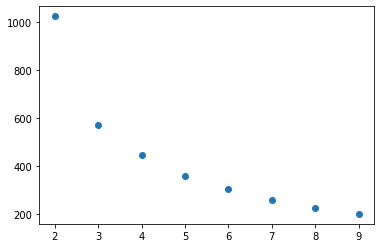

In [533]:
import matplotlib.pyplot as plt

plt.scatter(x=list(range(2,10)), y=elbow_clusters)

plt.show()

In [534]:
num_clusters_2 = 8

k_cluster = KMeans(num_clusters_2, random_state=42)
    
clusters = k_cluster.fit_predict(reduced_df[['LDA1', 'LDA2']])

In [535]:
reduced_df['Cluster_2'] = clusters

### 5.6 2nd Cluster Averages Table

In [536]:
averages_dict_2 = {}

total_per_cluster_2 = {}

for cluster in reduced_df['Cluster_2'].unique():
    
    cluster_group = reduced_df[reduced_df['Cluster_2'] == cluster]
    
    averages_dict_2[cluster] = np.mean(cluster_group)
    
    total_per_cluster_2[cluster] = len(cluster_group)

In [537]:
averages_df_2 = pd.DataFrame.from_dict(averages_dict_2, orient='index', 
                                       columns=reduced_df.drop('Player',axis=1).columns)

averages_df_2['Total Players'] = total_per_cluster_2.values()

averages_df_2 = averages_df_2.apply(lambda x: round(x, 3))

averages_df_2 = averages_df_2[['Cluster_2', 'Pos', 'Age', 'TS%', '3PAr', 'FTr', 'ORB%', 'AST%', 'TOV%', 'USG%',
       'STL%', 'BLK%', 'DBPM', 'DRAYMOND', 'Total Players']]

averages_df_2['Cluster_2'] = averages_df_2['Cluster_2'].apply(lambda x: int(x))

In [538]:
averages_df_2 = averages_df_2.sort_values(by='Pos', ascending=True)

In [539]:
averages_df_2.sort_values(by='Pos', ascending=True)

,Cluster_2,Pos,Age,TS%,3PAr,FTr,ORB%,AST%,TOV%,USG%,STL%,BLK%,DBPM,DRAYMOND,Total Players
3,3,1.465,27.930,0.552,0.333,0.298,2.547,30.370,14.226,26.556,1.872,1.028,-0.228,-0.386,43
0,0,1.767,25.933,0.534,0.416,0.206,2.335,17.248,11.657,19.793,1.703,0.878,-0.248,-0.650,60
7,7,2.333,26.963,0.545,0.574,0.147,2.093,9.102,9.461,16.163,1.296,0.930,-0.463,-0.535,54
5,5,3.226,26.194,0.557,0.290,0.281,3.877,15.216,13.023,21.100,1.565,1.803,0.297,0.543,31
2,2,3.486,26.571,0.565,0.479,0.209,4.626,8.066,10.766,16.191,1.294,1.977,0.111,0.413,35
1,1,4.679,25.107,0.590,0.161,0.307,9.586,10.218,11.864,19.343,1.318,3.150,0.043,0.872,28
4,4,4.800,24.100,0.610,0.110,0.449,10.090,17.230,13.980,25.370,1.650,3.690,1.490,1.092,10
6,6,5.000,25.400,0.640,0.019,0.431,13.020,7.873,13.213,16.413,1.340,5.073,1.193,1.954,15


### 5.7 Find Cluster Centers and Calculate the Closest Player to Each

In [540]:
cluster_centers = k_cluster.cluster_centers_.tolist()

example_players = []

for x, y in cluster_centers:
    
    min_dist = 1000
    
    player = str()
    
    tmp_df = reduced_df.copy()
    
    tmp_df['L2_dist'] = np.sqrt( ( (tmp_df['LDA1'] - x) ** 2) + ( (tmp_df['LDA2'] - y) ** 2) ) # euclidian dist (l2)
    
    for i in range(len(tmp_df)):
        
        if tmp_df.loc[i,'L2_dist'] < min_dist:
            
            min_dist = tmp_df.loc[i, 'L2_dist']
            
            player = tmp_df.loc[i, 'Player']
    
    example_players.append(player)

In [541]:
player_clusters = {}

for player in example_players:
    
    index = reduced_df[reduced_df.loc[:,'Player'] == player].index
    
    cluster = reduced_df.loc[index, 'Cluster_2'].values
    
    player_clusters[player] = cluster

In [542]:
averages_df_2 = averages_df_2.sort_values('Cluster_2', ascending=True)

In [543]:
averages_df_2['Example'] = list(player_clusters.keys())

In [544]:
averages_df_2 = averages_df_2.sort_values('Pos', ascending=True)

averages_df_2['Cluster Name'] = ['Star guards', 'Combo guards', 'Shooters', 'Slashing wings',
                                 'Three-and-d forwards', 'Defensive bigs', 'Star forwards', 'Centers']

### 5.8 Averages DF with Example Players Added

In [545]:
averages_df_2

,Cluster_2,Pos,Age,TS%,3PAr,FTr,ORB%,AST%,TOV%,USG%,STL%,BLK%,DBPM,DRAYMOND,Total Players,Example,Cluster Name
3,3,1.465,27.930,0.552,0.333,0.298,2.547,30.370,14.226,26.556,1.872,1.028,-0.228,-0.386,43,Damian Lillard,Star guards
0,0,1.767,25.933,0.534,0.416,0.206,2.335,17.248,11.657,19.793,1.703,0.878,-0.248,-0.650,60,Tyler Johnson,Combo guards
7,7,2.333,26.963,0.545,0.574,0.147,2.093,9.102,9.461,16.163,1.296,0.930,-0.463,-0.535,54,Vince Carter,Shooters
5,5,3.226,26.194,0.557,0.290,0.281,3.877,15.216,13.023,21.100,1.565,1.803,0.297,0.543,31,Jabari Parker,Slashing wings
2,2,3.486,26.571,0.565,0.479,0.209,4.626,8.066,10.766,16.191,1.294,1.977,0.111,0.413,35,Jonas Jerebko,Three-and-d forwards
1,1,4.679,25.107,0.590,0.161,0.307,9.586,10.218,11.864,19.343,1.318,3.150,0.043,0.872,28,Tristan Thompson,Defensive bigs
4,4,4.800,24.100,0.610,0.110,0.449,10.090,17.230,13.980,25.370,1.650,3.690,1.490,1.092,10,Domantas Sabonis,Star forwards
6,6,5.000,25.400,0.640,0.019,0.431,13.020,7.873,13.213,16.413,1.340,5.073,1.193,1.954,15,Hassan Whiteside,Centers


In [546]:
# averages_df_2 = averages_df_2.sort_values('Cluster_2', ascending=True)

cluster_and_player = []

for i in range(len(averages_df_2)):
    
    cluster = averages_df_2.loc[i, 'Cluster Name']
    
    player = averages_df_2.loc[i, 'Example']
    
    cluster_and_player.append(str(cluster) + ': ' + str(player))

### 5.9 Graph Clusters in 2D

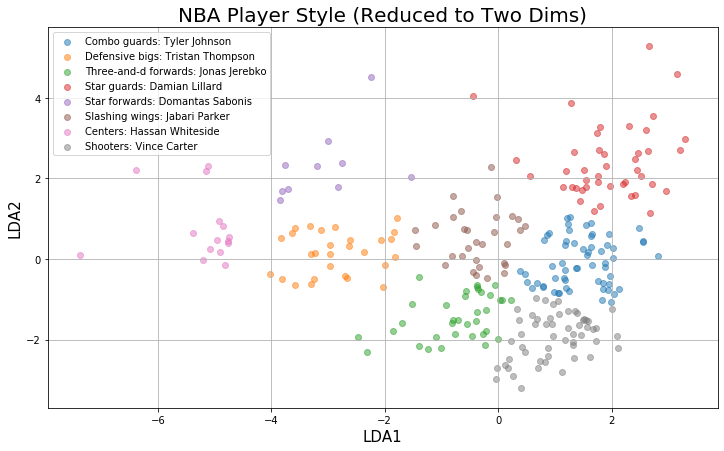

In [547]:
import matplotlib.pyplot as plt

# cmap = plt.cm.get_cmap('jet', reduced_df['Cluster_2'].nunique())

fig, ax = plt.subplots(figsize=(12,7))

ax.set_title('NBA Player Style (Reduced to Two Dims)', size=20)

ax.set_xlabel('LDA1', size=15)

ax.set_ylabel('LDA2', size=15)

handles = []

for cluster in range(num_clusters_2):
    
    handles.append(cluster)
    
    tmp_df = reduced_df[reduced_df['Cluster_2'] == cluster]
    
    ax.scatter(tmp_df['LDA1'], tmp_df['LDA2'], label=cluster, alpha=0.5)

ax.legend(cluster_and_player)

ax.grid()

plt.show()

### 5.99 Dissimilarity Calculator

In [548]:
total_player_diff = []

for player in reduced_df['Player']:
    
    new_index = reduced_df['Player'].tolist().index(player)
    
    player_stats = np.asarray(reduced_df.iloc[new_index,:])
    
    sub_player_diff = []
    
    for i in range(len(reduced_df)):
        lda1, lda2 = player_stats[-3], player_stats[-2]
        ilda1, ilda2 = reduced_df['LDA1'][i], reduced_df['LDA2'][i]
        total_1 = lda1 - ilda1
        total_2 = lda2 - ilda2
        l2_norm = np.sqrt(total_1 ** 2 + total_2 ** 2)
        sub_player_diff.append(l2_norm)
    
    sub_mean = np.mean(sub_player_diff)
    
    total_player_diff.append(sub_mean)

total_mean, total_std = np.mean(total_player_diff), np.std(total_player_diff)

### 6.0 Input Player to Get Comps

In [549]:
# Input player name:

player_name = input('Player name: ')

# Retrieve index of player name:

index = reduced_df['Player'].tolist().index(f'{player_name}')

# Pull player's stats:

player_stats = reduced_df.iloc[index,:]

player_stats = np.asarray(player_stats)

Player name: Joel Embiid


### 6.1 Input Player You Would Like to Compare

In [550]:
comp_name = input('Comp player name: ')

comp_index = reduced_df['Player'].tolist().index(f'{comp_name}')

comp_stats = reduced_df.iloc[comp_index,:]

comp_stats = np.asarray(comp_stats)

Comp player name: Ben Simmons


### 6.2 Calculate L2-Norms

In [551]:
# Loop through and create a list of L2-Norms:

player_diff = []

for i in range(len(reduced_df)):
    lda1, lda2 = player_stats[-3], player_stats[-2]
    ilda1, ilda2 = reduced_df['LDA1'][i], reduced_df['LDA2'][i]
    total_1 = lda1 - ilda1
    total_2 = lda2 - ilda2
    l2_norm = np.sqrt(total_1 ** 2 + total_2 ** 2)
    player_diff += [(i,l2_norm)]

# And for just Target Comp:

lda1, lda2 = player_stats[-3], player_stats[-2]
ilda1, ilda2 = comp_stats[-3], comp_stats[-2]
total_1 = lda1 - ilda1
total_2 = lda2 - ilda2
l2_norm = np.sqrt(total_1 ** 2 + total_2 ** 2)
target_comp = l2_norm

In [552]:
# Initialize:

comp_1, it_1, comp_2, it_2, comp_3, it_3 = [x for x in np.zeros(6) + 3]

# 1. Best Comp:

for i in range(len(player_diff)):
    if (player_diff[i][1] < comp_1) and (player_diff[i][1] > 0):
        comp_1 = player_diff[i][1]
        it_1 = i

# 2. Second Comp:

for i in range(len(player_diff)):
    if (player_diff[i][1] < comp_2) and (player_diff[i][1] > comp_1):
        comp_2 = player_diff[i][1]
        it_2 = i

# 3. Third Comp:

for i in range(len(player_diff)):
    if (player_diff[i][1] < comp_3) and (player_diff[i][1] > comp_1) and (player_diff[i][1] > comp_2):
        comp_3 = player_diff[i][1]
        it_3 = i

print(it_1, it_2, it_3)



62 228 212


In [553]:
# Dissimilarity (dissim_factor) calculation to add to final comp_df:

dissimilarity = 0

for i in range(len(player_diff)):
    
    dissimilarity += player_diff[i][1]

dissimilarity = dissimilarity / len(player_diff)

dissim_factor = (dissimilarity - total_mean) / total_std

### 7.0 Player Comp Df

In [554]:
player_comp_df = pd.DataFrame()

player_comp_df['Actual Player'] = reduced_df.iloc[index,1:]
player_comp_df['Top Comp'] = reduced_df.iloc[it_1,1:]
player_comp_df['Second-Best Comp'] = reduced_df.iloc[it_2,1:]
player_comp_df['Third-Best Comp'] = reduced_df.iloc[it_3,1:]
player_comp_df['Target Comp'] = reduced_df.iloc[comp_index,1:]

In [555]:
comp_df = pd.DataFrame(np.transpose(player_comp_df.values))

list_of_columns = list(total_df.columns.drop('Player')) + ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'Cluster',
                                                           'LDA1', 'LDA2', 'Cluster_2']

comp_df.columns = list_of_columns

comp_df['Player'] = [reduced_df.iloc[index,0], reduced_df.iloc[it_1,0], reduced_df.iloc[it_2,0],
                     reduced_df.iloc[it_3,0], reduced_df.iloc[comp_index,0]]

In [556]:
player_subject = pd.Series(scaled_vectors[index, :])

comp_a = pd.Series(scaled_vectors[it_1, :])
comp_b = pd.Series(scaled_vectors[it_2, :])
comp_c = pd.Series(scaled_vectors[it_3, :])
comp_target = pd.Series(scaled_vectors[comp_index, :])

scaled_array = np.array([player_subject, comp_a, comp_b, comp_c, comp_target])

new_columns = ['sPos', 'sAge', 'sTS%', 's3PAr', 'sFTr', 'sORB%', 'sAST%', 'sTOV%', 
               'sUSG%', 'sSTL%', 'sBLK%', 'sDBPM', 'sDRAY']

for i, column in enumerate(new_columns):
    comp_df[column] = [round(scaled_array[x][i], 2) for x in range(5)]

In [557]:
comp_df['Similarity Score'] = [1, round(1 - comp_1/dissimilarity, 3), round(1 - comp_2/dissimilarity, 3), 
                               round(1 - comp_3/dissimilarity, 3), round(1 - target_comp/dissimilarity, 3)]

In [558]:
keep_columns = comp_df.columns

keep_columns = ['Player', 'Pos', 'Age', 'sPos', 'sAge', 'sTS%', 's3PAr',
       'sFTr', 'sORB%', 'sAST%', 'sTOV%', 'sUSG%', 'sSTL%', 'sBLK%', 'sDBPM', 'sDRAY',
       'Similarity Score', 'Cluster_2']

comp_df = comp_df[keep_columns]

In [559]:
comp_df.columns = ['Player', 'Pos', 'Age', 'sPos', 'sAge', 'sTS%', 's3PAr',
       'sFTr', 'sORB%', 'sAST%', 'sTOV%', 'sUSG%', 'sSTL%', 'sBLK%', 'sDBPM', 'sDRAY',
       'Similarity', 'Cluster_2']

In [560]:
comp_df['sDRAY'] = comp_df['sDRAY'].apply(lambda x: round(x,2))

In [561]:
comp_df

,Player,Pos,Age,sPos,sAge,sTS%,s3PAr,sFTr,sORB%,sAST%,sTOV%,sUSG%,sSTL%,sBLK%,sDBPM,sDRAY,Similarity,Cluster_2
0,Joel Embiid,5,24,1.59,-0.59,0.77,-0.79,2.67,1.02,0.38,0.42,2.58,-0.97,1.80,0.78,1.88,1.000,4
1,Anthony Davis,5,25,1.59,-0.34,0.86,-1.20,1.58,1.52,0.45,-1.08,1.85,1.26,2.87,1.97,0.89,0.874,4
2,Domantas Sabonis,5,22,1.59,-1.08,1.62,-1.81,1.53,1.96,0.35,1.35,0.71,-0.41,-0.14,1.12,0.14,0.865,4
3,Mason Plumlee,5,28,1.59,0.40,0.97,-1.81,1.82,1.63,0.50,2.29,-0.69,0.71,1.46,2.23,1.03,0.799,4
4,Ben Simmons,1,22,-1.29,-1.08,0.51,-1.90,1.80,0.69,2.18,2.32,0.44,0.89,0.06,1.12,0.74,0.409,3
